In [2]:
#import os 
import numpy as np
import pandas
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
import federated as fd


OUTPUT:



In [3]:
# function to compute the global second-moment matrix and PCA subspace
def globalPCA(Cs, K):
    C = 0
    S = len(Cs)
    for s in range(S):
        C += Cs[s]
    C = (1/S) * C
    U, S, V = np.linalg.svd(C)
    Uk = U[:, :K]
    return Uk


OUTPUT:



In [4]:
result=[]

cnt=0
for iteration in range(1):
  fd.startCycle("fed_PCA")
  while cnt<3:
    res=fd.retrieveData()
    if res is None:
        break
    result.append(res)
    cnt = cnt + 1
print("cnt",cnt)
for i in range(cnt):
  print("res", result[i][0]+' elements:'+str(len(result[0])))
  print("CD", result[i][1].shape)
  print("UC", result[i][2].shape)
  print("nonIBD", result[i][3].shape)


OUTPUT:
('cnt', 3)
('res', 'MGH elements:4')
('CD', (24, 24))
('UC', (24, 24))
('nonIBD', (24, 24))
('res', 'Cincinnati elements:4')
('CD', (24, 24))
('UC', (24, 24))
('nonIBD', (24, 24))
('res', 'CedarsSinai elements:4')
('CD', (24, 24))
('UC', (24, 24))
('nonIBD', (24, 24))



In [5]:
if (cnt == 3):
  X1_CD = result[0][1]
  X2_CD = result[1][1]
  X3_CD = result[2][1]
  X1_UC = result[0][2]
  X2_UC = result[1][2]
  X3_UC = result[2][2]
  X1_nonIBD = result[0][3]
  X2_nonIBD = result[1][3]
  X3_nonIBD = result[2][3]

  CD_ans = globalPCA([X1_CD,X3_CD], K = 3)
  UC_ans = globalPCA([X1_UC,X3_UC] ,K = 3)
  nonIBD_ans = globalPCA([X1_nonIBD,X3_nonIBD], K = 3) 
  d={"PC1_CD":CD_ans.T[0] ,"PC2_CD":CD_ans.T[1],\
     "PC1_UC":UC_ans.T[0] ,"PC2_UC":UC_ans.T[1],\
     "PC1_nonIBD":nonIBD_ans.T[0] ,"PC2_nonIBD":nonIBD_ans.T[1]}



OUTPUT:




OUTPUT:
[[ -13.46771313  -12.06472892]
 [ -12.45630819 -101.07488147]]
[[ inf  inf]
 [-inf -inf]]
[inf inf]
[[1324.61723243 -106.90819213]
 [1325.62992095 -108.81711855]]
[[ -13.46771313 -101.07488147]
 [ -12.45630819  -12.06472892]]
[inf inf]
[[-1.67518099e+05 -1.06040486e+02]
 [-1.67500299e+05 -1.07877491e+02]]
[[ -13.46771313 -108.81711855]
 [1325.62992095  -12.06472892]]
[1324.61723243           inf]



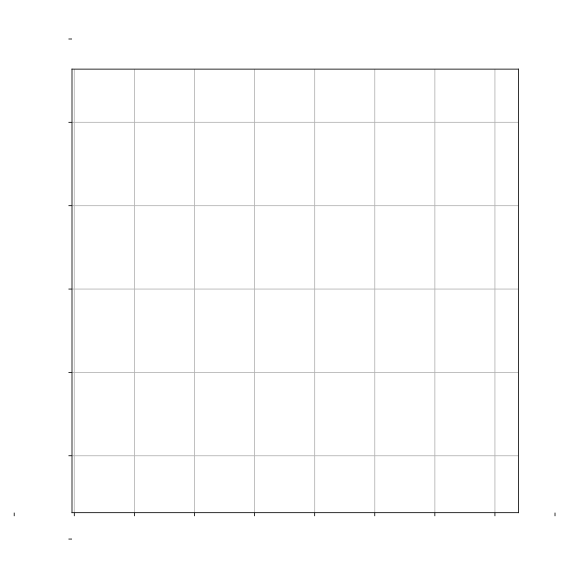

In [6]:
if 'd' in locals():
  df_PC = pandas.DataFrame(d)
  #visualization
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('2 Component PCA', fontsize = 20)

  Diagnosis = ['CD', 'UC', 'nonIBD']
  colors = ['r', 'g', 'b']

  ax.scatter(df_PC["PC1_CD"]
       , df_PC["PC2_CD"]
       , c = 'r'
       , s = 50)

  ax.scatter(df_PC["PC1_UC"]
       , df_PC["PC2_UC"]
       , c = 'g'
       , s = 50)

  ax.scatter(df_PC["PC1_nonIBD"]
      , df_PC["PC2_nonIBD"]
      , c = 'b'
      , s = 50)

  #ax.legend(Diagnosis)
  ax.grid()
  plt.savefig('/tmp/plot.svg') 
